In [25]:
#The goal is to predict the daily count of bikes that cross this brigde
#will have to figure out the features to use will have to build ourselves but have been brainstorming and finding them together in class


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('bridge.csv', index_col='Date', parse_dates=True,thousands=',')
df.columns = ['total','west','east']

/var/folders/8t/y5v94x215r973w80szwrht8r0000gq/T/ipykernel_37112/1452187524.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('bridge.csv', index_col='Date', parse_dates=True,thousands=',')


In [26]:
df.head() #shows how many bikes cross a bridge per hour, with data+time, total that cross, total that cross going west and total that cross
#going east 

,total,west,east
Date,,,
2025-07-31 23:00:00,23.0,15.0,8.0
2025-07-31 22:00:00,82.0,68.0,14.0
2025-07-31 21:00:00,155.0,117.0,38.0
2025-07-31 20:00:00,185.0,151.0,34.0
2025-07-31 19:00:00,202.0,159.0,43.0


In [27]:
df.dtypes

total    float64
west     float64
east     float64
dtype: object

<Axes: xlabel='Date'>

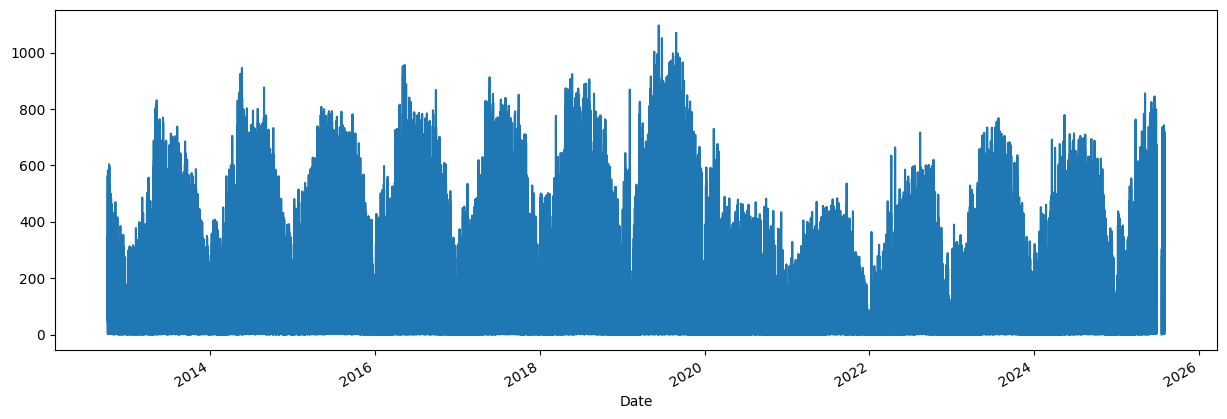

In [28]:
df['total'].plot(figsize=(15,5))

<Axes: xlabel='Date'>

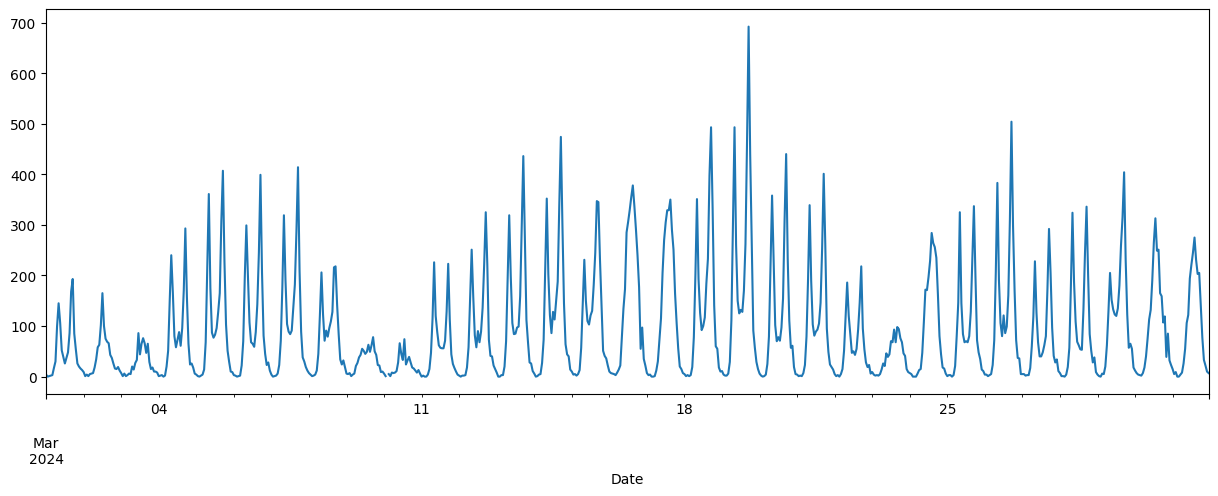

In [29]:
#Lets plot the total for March 2024, for just that month
march_24_data = df.loc['2024-03']['total']
march_24_data.plot(figsize=(15,5))

<Axes: xlabel='Date'>

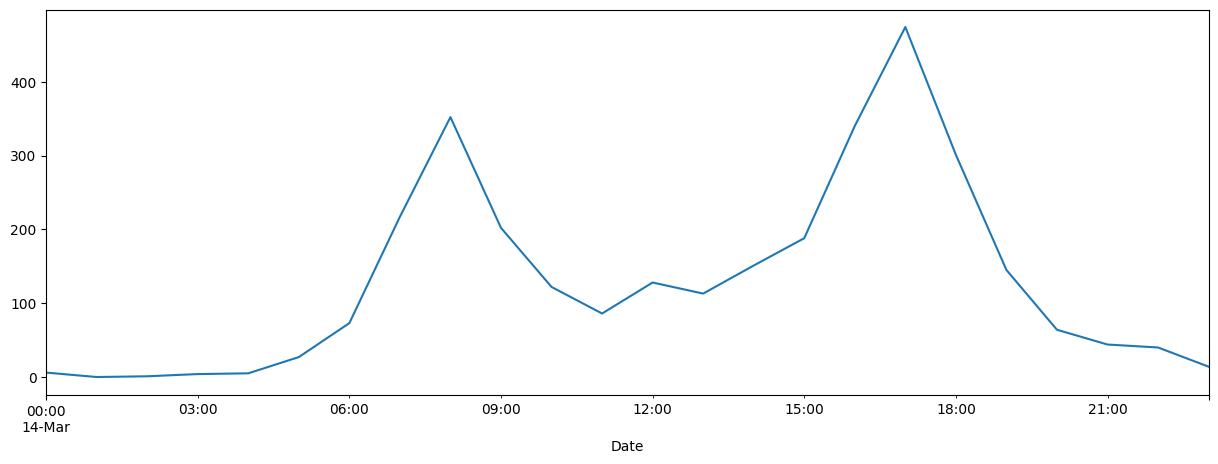

In [30]:
#doing just one day
march_24_day_data = df.loc['2024-03-14']['total']
march_24_day_data.plot(figsize=(15,5))

In [31]:
#now we are going to make a table, each column is a day, and each row is a hour in said day

df['hour'] = df.index.hour
df['date'] = df.index.date

table= df.pivot_table(values='total',index='hour',columns='date')
table.head()

date,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,...,2025-07-22,2025-07-23,2025-07-24,2025-07-25,2025-07-26,2025-07-27,2025-07-28,2025-07-29,2025-07-30,2025-07-31
hour,,,,,,,,,,,,,,,,,,,,,
0,NaN,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,...,17.0,7.0,10.0,21.0,47.0,39.0,17.0,9.0,5.0,12.0
1,NaN,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,...,10.0,4.0,8.0,9.0,18.0,21.0,3.0,7.0,11.0,2.0
2,NaN,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,...,2.0,7.0,8.0,4.0,7.0,11.0,3.0,3.0,1.0,3.0
3,NaN,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,...,6.0,5.0,5.0,6.0,5.0,9.0,6.0,15.0,5.0,7.0
4,NaN,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,...,17.0,16.0,16.0,10.0,10.0,7.0,12.0,9.0,18.0,12.0


<Axes: xlabel='hour'>

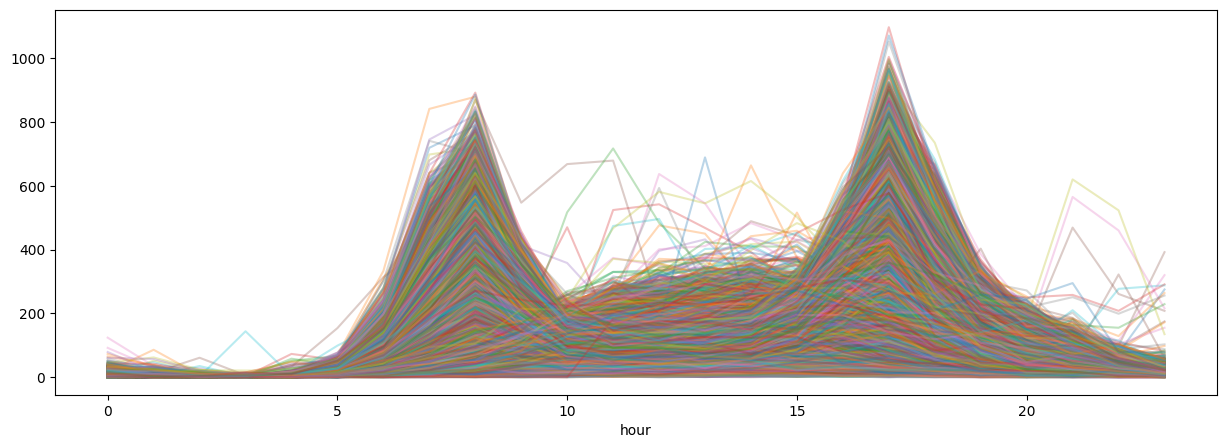

In [32]:
table.plot(figsize=(15,5),legend=False,alpha=.3) #ploting all these days on top of each other 

## We will now make it so that the dataset is grouped by day 

In [33]:
df_daily = df[['total']].resample('D').sum() #this is still the whole data set but now grouped by day
df_daily.head()

,total
Date,
2012-10-02,1938.0
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0


<Axes: xlabel='Date'>

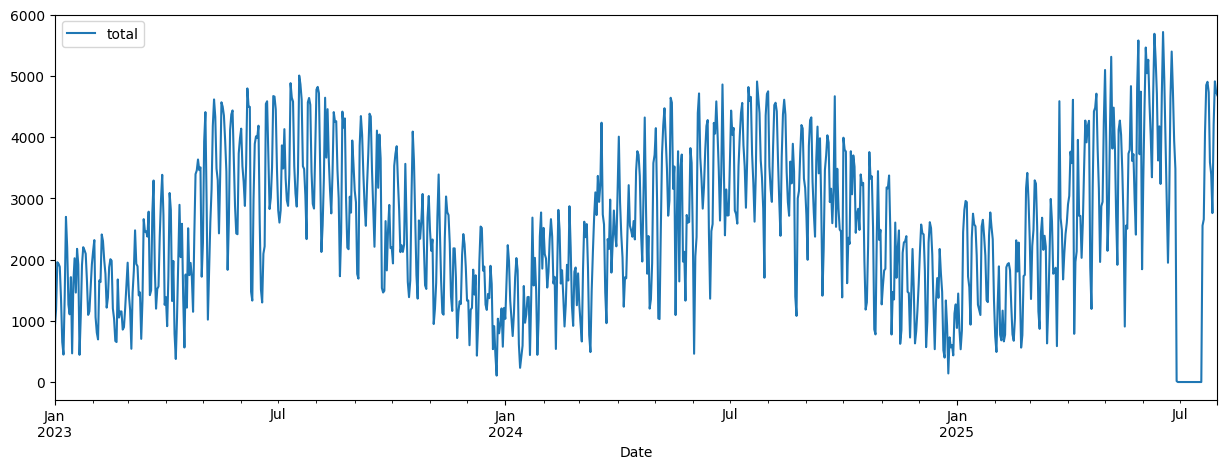

In [34]:
df_daily = df_daily[df_daily.index.year.isin([2023,2024,2025])] #now its only going to be for years 2023-2025
df_daily.plot(figsize=(15,5))

https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/about_data


The goal is to predict the daily count of bikes that cross this brigde
will have to figure out the features to use will have to build ourselves but have been brainstorming and finding them together in class

some ideas features:
weekend vs weekday 
temperature
weather so rain, clear etc
holidays/events


Weather data Column discrictions 
WT03 - Thunder
WESF - Water equivalent of snowfall
WT04 - Ice pellets, sleet, snow pellets, or small hail"
PRCP - Precipitation
WT05 - Hail (may include small hail)
WT06 - Glaze or rime
WT08 - Smoke or haze
SNWD - Snow depth
WDF2 - Direction of fastest 2-minute wind
WDF5 - Direction of fastest 5-second wind
PGTM - Peak gust time
WT11 - High or damaging winds
TMAX - Maximum temperature
DAPR - Number of days included in the multiday precipitation total (MDPR)
WSF2 - Fastest 2-minute wind speed
WSF5 - Fastest 5-second wind speed
SNOW - Snowfall
TOBS - Temperature at the time of observation
AWND - Average wind speed
WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
WESD - Water equivalent of snow on the ground
WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
TAVG - Average Temperature.
TMIN - Minimum temperature
MDPR - Multiday precipitation total (use with DAPR and DWPR, if available)

# No Weather data for now, on to other things

In [35]:
#holidays by using a pandas calander

from pandas.tseries.holiday import USFederalHolidayCalendar
calender = USFederalHolidayCalendar()
holidays = calender.holidays('01-01-2023','07-31-2025')
df_daily['holiday'] = pd.Series(1,index=holidays,name='holiday') #makes a 1 if there is a holiday with the day as a index 
df_daily.fillna(0,inplace=True) #orginally it had nans instead of 0's, this adds it

In [36]:
#day of the week 
df_daily['day_of_week'] = df_daily.index.dayofweek
df_daily['day_of_week'].astype(int)

Date
2023-01-01    6
2023-01-02    0
2023-01-03    1
2023-01-04    2
2023-01-05    3
             ..
2025-07-27    6
2025-07-28    0
2025-07-29    1
2025-07-30    2
2025-07-31    3
Freq: D, Name: day_of_week, Length: 943, dtype: int64

In [37]:
#hours of day light a proxy for temputure for now 
def get_hoursofdaylight(date):
    axis = np.radians(23.44) #title of the earths axis 
    latitude = np.radians(47.61) #lat and long for seattle 
    days = (date-pd.to_datetime('2000-12-31')).days #number of days from given day to our day
    m = (1 - np.tan(latitude)*np.tan(axis*np.cos(days*2*np.pi/365.25)))
    return 24*np.degrees(np.arccos(1-m))/180

get_hoursofdaylight(pd.to_datetime('2025-10-27'))


np.float64(10.490294037016053)

In [38]:
df_daily['hours_of_daylight'] = df_daily.index.map(get_hoursofdaylight)
df_daily

,total,holiday,day_of_week,hours_of_daylight
Date,,,,
2023-01-01,902.0,0.0,6,8.219065
2023-01-02,1186.0,1.0,0,8.220433
2023-01-03,1957.0,0.0,1,8.223167
2023-01-04,1932.0,0.0,2,8.227265
2023-01-05,1881.0,0.0,3,8.232723
...,...,...,...,...
2025-07-27,2759.0,0.0,6,15.360610
2025-07-28,4199.0,0.0,0,15.328417
2025-07-29,4910.0,0.0,1,15.295213


<Axes: xlabel='Date'>

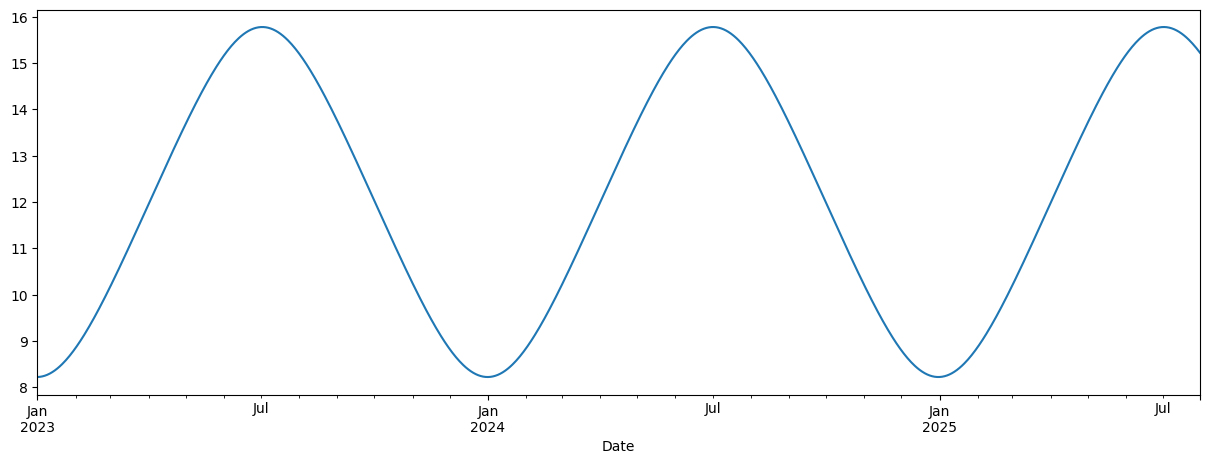

In [39]:
df_daily['hours_of_daylight'].plot(figsize=(15,5))

# Adding weather 

WSF2 - Fastest 2-minute wind speed.     
WSF5 - Fastest 5-second wind speed.     no
SNOW - Snowfall
WT03 - Thunder
WT04 - Ice pellets, sleet, snow pellets, or small hail"
PRCP - Precipitation
WT06 - Glaze or rime
WT08 - Smoke or haze
SNWD - Snow depth
WDF2 - Direction of fastest 2-minute wind
AWND - Average wind speed
WDF5 - Direction of fastest 5-second wind
PGTM - Peak gust time
WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
TMAX - Maximum temperature
WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
TAVG - Average Temperature.
TMIN - Minimum temperature

In [49]:
df_weather = pd.read_csv('weather_station.csv',index_col='DATE',parse_dates=True)
df_weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08
DATE,,,,,,,,,,,,,,,,,,,,
2023-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",1.79,NaN,0.01,0.0,0.0,44,46.0,35.0,140.0,140.0,8.9,16.1,1.0,NaN,NaN,NaN,NaN,NaN
2023-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,0.00,0.0,0.0,40,50.0,29.0,120.0,120.0,18.1,23.9,1.0,1.0,NaN,NaN,NaN,NaN
2023-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",6.93,NaN,0.00,0.0,0.0,41,49.0,37.0,110.0,120.0,15.0,25.9,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",14.32,NaN,0.02,0.0,0.0,44,50.0,40.0,120.0,120.0,28.0,42.9,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",17.00,NaN,0.00,0.0,0.0,51,59.0,48.0,110.0,120.0,32.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='DATE'>

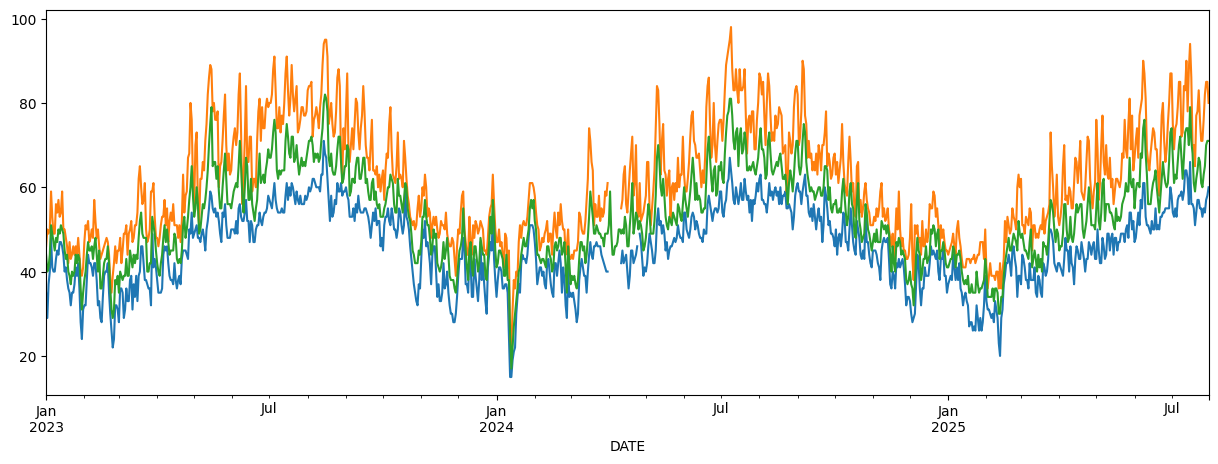

In [51]:
#temp
df_weather['TMIN'].plot(figsize=(15,5))
df_weather['TMAX'].plot(figsize=(15,5))
df_weather['TAVG'].plot(figsize=(15,5))

<Axes: xlabel='DATE'>

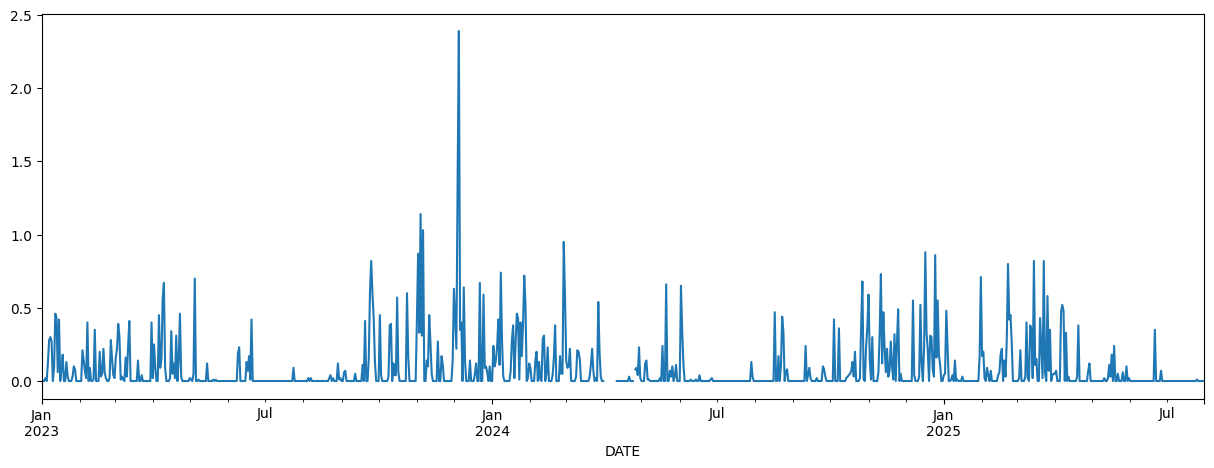

In [52]:
#precipatation
df_weather['PRCP'].plot(figsize=(15,5))

# Adding the weather to the daily thing

In [60]:
from sklearn.impute import KNNImputer

df_daily['precipitation'] = df_weather['PRCP']
df_daily['average_wind_speed'] = df_weather['AWND']
df_daily['average_temp'] = df_weather['TAVG'] #mabye switch bc epople look a lot at the min or max
df_daily['fog'] = df_weather['WT01'] #here its a 1 yes and nan for no, so replace nans with 0 later 



In [61]:
df_daily.head()

,total,holiday,day_of_week,hours_of_daylight,precipitation,average_wind_speed,average_temp,fog
Date,,,,,,,,
2023-01-01,902.0,0.0,6,8.219065,0.01,1.79,44,1.0
2023-01-02,1186.0,1.0,0,8.220433,0.00,8.50,40,1.0
2023-01-03,1957.0,0.0,1,8.223167,0.00,6.93,41,NaN
2023-01-04,1932.0,0.0,2,8.227265,0.02,14.32,44,NaN
2023-01-05,1881.0,0.0,3,8.232723,0.00,17.00,51,NaN


These coefs make sense to me, things like holidays, rain, wind, and fog all decrease the chance of someone biking, while things like it being eariler in the week, or a larger amount of day light help to encourge people to bike